<a href="https://colab.research.google.com/github/sid0312/10DaysMLChallenge/blob/master/classification_using_sklearn_classfiers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.linear_model import LinearRegression,RidgeClassifier,RidgeClassifierCV
from sklearn.kernel_ridge import KernelRidge
from sklearn import svm

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
data=pd.read_csv('/content/drive/My Drive/loan_status_train.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


**Cleaning the data**

In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None


In [0]:
cat_data = data.select_dtypes(include=['object']).copy()

In [6]:
cat_data.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,Semiurban,N


In [0]:
cat_data.drop(columns=['Loan_ID'],inplace=True)

In [8]:
cat_data.head(10)

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y
5,Male,Yes,2,Graduate,Yes,Urban,Y
6,Male,Yes,0,Not Graduate,No,Urban,Y
7,Male,Yes,3+,Graduate,No,Semiurban,N
8,Male,Yes,2,Graduate,No,Urban,Y
9,Male,Yes,1,Graduate,No,Semiurban,N


In [9]:
print(cat_data.isnull().values.sum())

63


In [10]:
print(cat_data.isnull().sum())
l=list(cat_data.isnull())
print(l)

Gender           13
Married           3
Dependents       15
Education         0
Self_Employed    32
Property_Area     0
Loan_Status       0
dtype: int64
['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


In [0]:
for col in l:
  cat_data[col] = cat_data[col].fillna(cat_data[col].value_counts().index[0])
  

In [12]:
print(cat_data.isnull().sum())

Gender           0
Married          0
Dependents       0
Education        0
Self_Employed    0
Property_Area    0
Loan_Status      0
dtype: int64


In [13]:
for col in l:
  print(cat_data[col].value_counts())
  print("____________________________________")

Male      502
Female    112
Name: Gender, dtype: int64
____________________________________
Yes    401
No     213
Name: Married, dtype: int64
____________________________________
0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64
____________________________________
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
____________________________________
No     532
Yes     82
Name: Self_Employed, dtype: int64
____________________________________
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
____________________________________
Y    422
N    192
Name: Loan_Status, dtype: int64
____________________________________


In [0]:
gender=[]
for i in list(cat_data['Gender']):
  if i=='Male':
    gender.append(1)
  elif i=='Female':
    gender.append(0)


In [0]:
married=[]
for i in list(cat_data['Married']):
  if i=='Yes':
    married.append(1)
  else:
    married.append(0)

In [0]:
education=[]
for i in list(cat_data['Education']):
  if i=='Graduate':
    education.append(1)
  else:
    education.append(0)

In [0]:
self_employed=[]
for i in list(cat_data['Self_Employed']):
  if i=='No':
    self_employed.append(1)
  else:
    self_employed.append(0)

In [0]:
loan_status=[]
for i in list(cat_data['Loan_Status']):
  if i=='Y':
    loan_status.append(1)
  else:
    loan_status.append(0)


In [0]:
cat_data = cat_data.copy()
cat_data = pd.get_dummies(cat_data, columns=['Dependents'], prefix = ['Dependents'])


In [20]:
cat_data.tail()

,Gender,Married,Education,Self_Employed,Property_Area,Loan_Status,Dependents_0,Dependents_1,Dependents_2,Dependents_3+
609,Female,No,Graduate,No,Rural,Y,1,0,0,0
610,Male,Yes,Graduate,No,Rural,Y,0,0,0,1
611,Male,Yes,Graduate,No,Urban,Y,0,1,0,0
612,Male,Yes,Graduate,No,Urban,Y,0,0,1,0
613,Female,No,Graduate,Yes,Semiurban,N,1,0,0,0


In [0]:
cat_data = cat_data.copy()
cat_data = pd.get_dummies(cat_data, columns=['Property_Area'], prefix = ['Property_Area'])

In [22]:
cat_data.tail()

,Gender,Married,Education,Self_Employed,Loan_Status,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
609,Female,No,Graduate,No,Y,1,0,0,0,1,0,0
610,Male,Yes,Graduate,No,Y,0,0,0,1,1,0,0
611,Male,Yes,Graduate,No,Y,0,1,0,0,0,0,1
612,Male,Yes,Graduate,No,Y,0,0,1,0,0,0,1
613,Female,No,Graduate,Yes,N,1,0,0,0,0,1,0


In [0]:
cat_data['gender']=gender

In [0]:
cat_data['married']=married
cat_data['education']=education
cat_data['self_employed']=self_employed
#cat_data['loan_status']=loan_status
drops=['Gender','Married','Education','Self_Employed','Loan_Status']
cat_data.drop(columns=drops,inplace=True)

In [25]:
cat_data.tail()

,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,gender,married,education,self_employed
609,1,0,0,0,1,0,0,0,0,1,1
610,0,0,0,1,1,0,0,1,1,1,1
611,0,1,0,0,0,0,1,1,1,1,1
612,0,0,1,0,0,0,1,1,1,1,1
613,1,0,0,0,0,1,0,0,0,1,0


In [26]:
data.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [0]:
adds=['ApplicantIncome',	'CoapplicantIncome',	'LoanAmount'	,'Loan_Amount_Term'	,'Credit_History']

In [0]:
numeric=pd.DataFrame(columns=adds)

In [0]:
numeric['ApplicantIncome']=data['ApplicantIncome']
numeric['CoapplicantIncome']=data['CoapplicantIncome']
numeric['Credit_History']=data['Credit_History']
numeric['Loan_Amount_Term']=data['Loan_Amount_Term']
numeric['LoanAmount']=data['LoanAmount']

In [30]:
numeric.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0


In [31]:
print(numeric.isnull().sum())
l=list(numeric.isnull())
print(l)

ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
dtype: int64
['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


In [0]:
for col in l:
  numeric[col] = numeric[col].fillna(numeric[col].mean())
  

In [33]:
numeric.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,146.412162,360.0,1.0
1,4583,1508.0,128.000000,360.0,1.0
2,3000,0.0,66.000000,360.0,1.0
3,2583,2358.0,120.000000,360.0,1.0
4,6000,0.0,141.000000,360.0,1.0


In [0]:
cat_data['scaledapplicantincome']=numeric['ApplicantIncome']
cat_data['scaledcoapplicantincome']=numeric['CoapplicantIncome']
cat_data['scaledcredit_history']=numeric['Credit_History']
cat_data['scaledloan_amount_term']=numeric['Loan_Amount_Term']
cat_data['scaledloanamount']=numeric['LoanAmount']

In [0]:
cat_data['loan_status']=loan_status

In [0]:
final=cat_data

In [37]:
final.head(10)

,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,gender,married,education,self_employed,scaledapplicantincome,scaledcoapplicantincome,scaledcredit_history,scaledloan_amount_term,scaledloanamount,loan_status
0,1,0,0,0,0,0,1,1,0,1,1,5849,0.0,1.0,360.0,146.412162,1
1,0,1,0,0,1,0,0,1,1,1,1,4583,1508.0,1.0,360.0,128.000000,0
2,1,0,0,0,0,0,1,1,1,1,0,3000,0.0,1.0,360.0,66.000000,1
3,1,0,0,0,0,0,1,1,1,0,1,2583,2358.0,1.0,360.0,120.000000,1
4,1,0,0,0,0,0,1,1,0,1,1,6000,0.0,1.0,360.0,141.000000,1
5,0,0,1,0,0,0,1,1,1,1,0,5417,4196.0,1.0,360.0,267.000000,1
6,1,0,0,0,0,0,1,1,1,0,1,2333,1516.0,1.0,360.0,95.000000,1
7,0,0,0,1,0,1,0,1,1,1,1,3036,2504.0,0.0,360.0,158.000000,0
8,0,0,1,0,0,0,1,1,1,1,1,4006,1526.0,1.0,360.0,168.000000,1
9,0,1,0,0,0,1,0,1,1,1,1,12841,10968.0,1.0,360.0,349.000000,0


In [0]:
feature_names=list(final.drop(columns=['loan_status'],inplace=False).columns)

In [39]:
feature_names

['Dependents_0',
 'Dependents_1',
 'Dependents_2',
 'Dependents_3+',
 'Property_Area_Rural',
 'Property_Area_Semiurban',
 'Property_Area_Urban',
 'gender',
 'married',
 'education',
 'self_employed',
 'scaledapplicantincome',
 'scaledcoapplicantincome',
 'scaledcredit_history',
 'scaledloan_amount_term',
 'scaledloanamount']

In [0]:
label_names=['loan_status']
X=final[feature_names]
y=final[label_names]

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)

In [42]:
X_train.shape

(429, 16)

In [43]:
X_test.shape

(185, 16)

In [0]:
scaler=StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [0]:
linreg=LinearRegression(normalize=True)

In [46]:
linreg.fit(X_train,y_train.values.ravel())

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [47]:
print('Accuracy of Linear regression classifier on training set: {:.2f}'
     .format(linreg.score(X_train, y_train)))
print('Accuracy of Linear regression classifier on test set: {:.2f}'
     .format(linreg.score(X_test, y_test)))
l_train=linreg.score(X_train, y_train)
l_test=linreg.score(X_test,y_test)

Accuracy of Linear regression classifier on training set: 0.37
Accuracy of Linear regression classifier on test set: 0.21


In [48]:
model=RidgeClassifier().fit(X_train,y_train.values.ravel())
print('Accuracy of Ridge regression classifier on training set: {:.4f}'
     .format(model.score(X_train, y_train)))
print('Accuracy of Ridge regression classifier on test set: {:.4f}'
     .format(model.score(X_test, y_test)))
rg_train=model.score(X_train, y_train)
rg_test= model.score(X_test,y_test)

Accuracy of Ridge regression classifier on training set: 0.8182
Accuracy of Ridge regression classifier on test set: 0.8000


In [49]:
svc=svm.SVC(probability=True)
svc.fit(X_train,y_train.values.ravel())

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [50]:
print('Accuracy of Support Vector Machine classifier on training set: {:.4f}'
     .format(svc.score(X_train,y_train.values.ravel())))
print('Accuracy of Support Vector Machine classifier on test set: {:.4f}'
     .format(svc.score(X_test,y_test.values.ravel())))
svc_train=svc.score(X_train,y_train.values.ravel())
svc_test=svc.score(X_test,y_test.values.ravel())

Accuracy of Support Vector Machine classifier on training set: 0.8298
Accuracy of Support Vector Machine classifier on test set: 0.8054


In [51]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB
gnb = GaussianNB()
gnb.fit(X_train,y_train.values.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
gnb_test=gnb.score(X_test,y_test)

In [0]:
gnb_train=gnb.score(X_train,y_train)

In [0]:
bnb=BernoulliNB()
bnb.fit(X_train,y_train.values.ravel())
bnb_test=bnb.score(X_test,y_test)

In [0]:
bnb_train=bnb.score(X_train,y_train)

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
rf = RandomForestClassifier(max_depth=2, random_state=0)

In [58]:
rf.fit(X_train,y_train.values.ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [0]:
rf_test=rf.score(X_test,y_test)

In [0]:
rf_train=rf.score(X_train,y_train)

In [0]:
train_acc_set=[l_train,rg_train,svc_train,gnb_train,bnb_train,rf_train]
test_acc_set=[l_test,rg_test,svc_test,gnb_test,bnb_test,rf_test]

In [0]:
classifiers=['lin_reg','ridge_reg','SVM','GNB','BNB','RF']
clf,clt=classifiers,classifiers

No handles with labels found to put in legend.


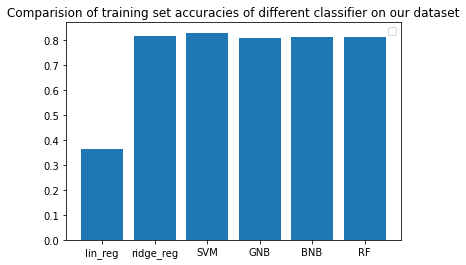

In [63]:
plt.bar(clf,train_acc_set)
plt.title('Comparision of training set accuracies of different classifier on our dataset')
plt.legend()
plt.show()

No handles with labels found to put in legend.


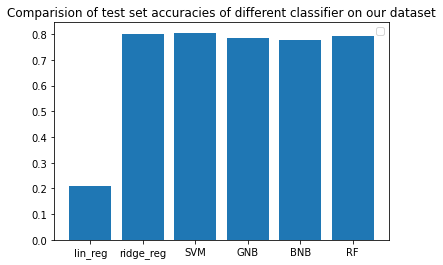

In [64]:
plt.bar(clt,test_acc_set)
plt.title('Comparision of test set accuracies of different classifier on our dataset')
plt.legend()
plt.show()